In [1]:
import pandas as pd
import numpy as np

# Loading data

In [2]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

# First 5 records

In [3]:
dataframe.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

# Data type

In [4]:
dataframe['date'].dtype


dtype('O')

# Loading data with parse_dates

In [5]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

In [6]:
df2.head()

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

# Data Type

In [7]:
df2['date'].dtype

dtype('<M8[ns]')

# Loading Data as a series

In [8]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0).squeeze()


In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

# Querying by time

In [12]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

date  births
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
5  1959-01-06      29
6  1959-01-07      45
7  1959-01-08      43
8  1959-01-09      38
9  1959-01-10      27
10 1959-01-11      38
11 1959-01-12      33
12 1959-01-13      55
13 1959-01-14      47
14 1959-01-15      45
15 1959-01-16      37
16 1959-01-17      50
17 1959-01-18      43
18 1959-01-19      41
19 1959-01-20      52
20 1959-01-21      34

# Descriptive Statistics

In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df2.describe()

date      births
count                  365  365.000000
mean   1959-07-02 00:00:00   41.980822
min    1959-01-01 00:00:00   23.000000
25%    1959-04-02 00:00:00   37.000000
50%    1959-07-02 00:00:00   42.000000
75%    1959-10-01 00:00:00   46.000000
max    1959-12-31 00:00:00   73.000000
std                    NaN    7.348257

# Feature Engineering

1.Date time features

In [16]:
df2.head(5)

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

In [17]:
features = df2.copy()
features['year'] = df2['date'].dt.year
features['month'] = df2['date'].dt.month
features['day'] = df2['date'].dt.day
features.head(5)

date  births  year  month  day
0 1959-01-01      35  1959      1    1
1 1959-01-02      32  1959      1    2
2 1959-01-03      30  1959      1    3
3 1959-01-04      31  1959      1    4
4 1959-01-05      44  1959      1    5

2.Lag features

In [18]:
features['lag1'] =  df2['births'].shift(2)
features['lag2'] =  df2['births'].shift(365)
features.head(7)

date  births  year  month  day  lag1  lag2
0 1959-01-01      35  1959      1    1   NaN   NaN
1 1959-01-02      32  1959      1    2   NaN   NaN
2 1959-01-03      30  1959      1    3  35.0   NaN
3 1959-01-04      31  1959      1    4  32.0   NaN
4 1959-01-05      44  1959      1    5  30.0   NaN
5 1959-01-06      29  1959      1    6  31.0   NaN
6 1959-01-07      45  1959      1    7  44.0   NaN

3.Window features

In [19]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()
features.head(5)

date  births  year  month  day  lag1  lag2  Roll_mean
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN
1 1959-01-02      32  1959      1    2   NaN   NaN       33.5
2 1959-01-03      30  1959      1    3  35.0   NaN       31.0
3 1959-01-04      31  1959      1    4  32.0   NaN       30.5
4 1959-01-05      44  1959      1    5  30.0   NaN       37.5

In [20]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()
features.head(5)

date  births  year  month  day  lag1  lag2  Roll_mean  Roll_max
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN       NaN
1 1959-01-02      32  1959      1    2   NaN   NaN       33.5       NaN
2 1959-01-03      30  1959      1    3  35.0   NaN       31.0      35.0
3 1959-01-04      31  1959      1    4  32.0   NaN       30.5      32.0
4 1959-01-05      44  1959      1    5  30.0   NaN       37.5      44.0

4.Expanding features

In [21]:
features['Expand_max'] = df2['births'].expanding().max()
features.head(10)

date  births  year  month  day  lag1  lag2  Roll_mean  Roll_max  \
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN       NaN   
1 1959-01-02      32  1959      1    2   NaN   NaN       33.5       NaN   
2 1959-01-03      30  1959      1    3  35.0   NaN       31.0      35.0   
3 1959-01-04      31  1959      1    4  32.0   NaN       30.5      32.0   
4 1959-01-05      44  1959      1    5  30.0   NaN       37.5      44.0   
5 1959-01-06      29  1959      1    6  31.0   NaN       36.5      44.0   
6 1959-01-07      45  1959      1    7  44.0   NaN       37.0      45.0   
7 1959-01-08      43  1959      1    8  29.0   NaN       44.0      45.0   
8 1959-01-09      38  1959      1    9  45.0   NaN       40.5      45.0   
9 1959-01-10      27  1959      1   10  43.0   NaN       32.5      43.0   

   Expand_max  
0        35.0  
1        35.0  
2        35.0  
3        35.0  
4        44.0  
5        44.0  
6        45.0  
7        45.0  
8        45.0  
9        45.0

# Time Series - Data Visualization

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
Dataviz_df = df2.copy()

In [24]:
Dataviz_df.head(10)

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44
5 1959-01-06      29
6 1959-01-07      45
7 1959-01-08      43
8 1959-01-09      38
9 1959-01-10      27

<Axes: >

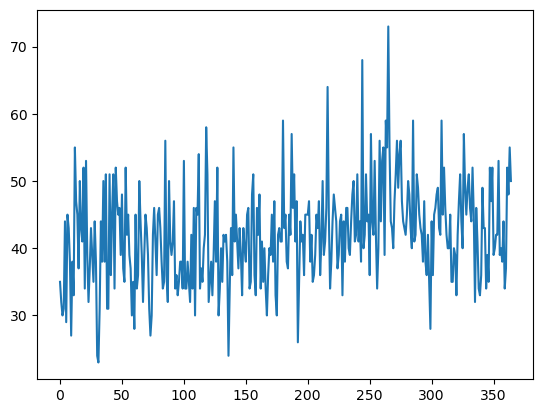

In [25]:
Dataviz_df['births'].plot()

<Axes: xlabel='date'>

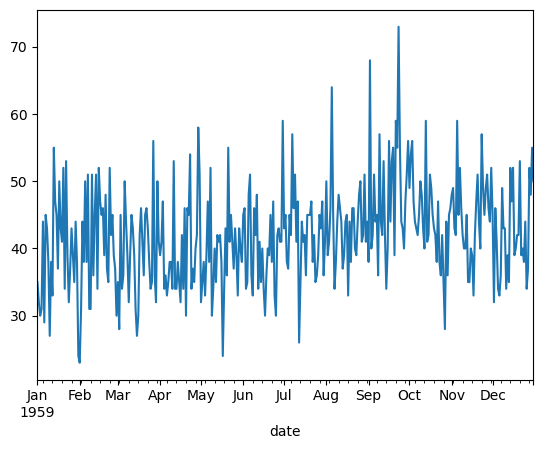

In [26]:
Dataviz_df.index = Dataviz_df['date'] 
Dataviz_df['births'].plot()

# Zooming In 

In [27]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()
Dataviz_df2

date  births
date                         
1959-01-02 1959-01-02      32
1959-01-03 1959-01-03      30
1959-01-04 1959-01-04      31
1959-01-05 1959-01-05      44
1959-01-06 1959-01-06      29
1959-01-07 1959-01-07      45
1959-01-08 1959-01-08      43
1959-01-09 1959-01-09      38
1959-01-10 1959-01-10      27

<Axes: xlabel='date'>

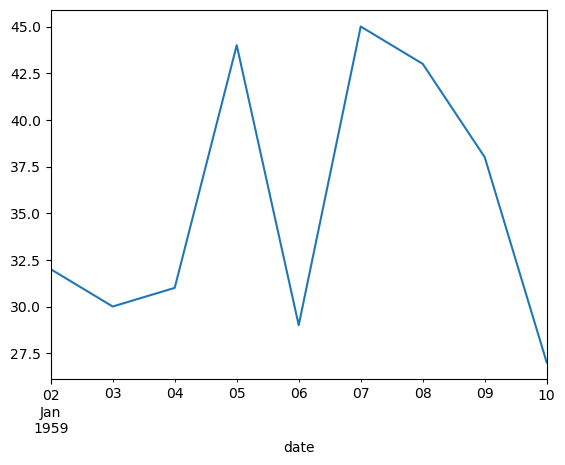

In [28]:
Dataviz_df2['births'].plot()

# Trendline

In [29]:
import seaborn as sns

<Axes: ylabel='births'>

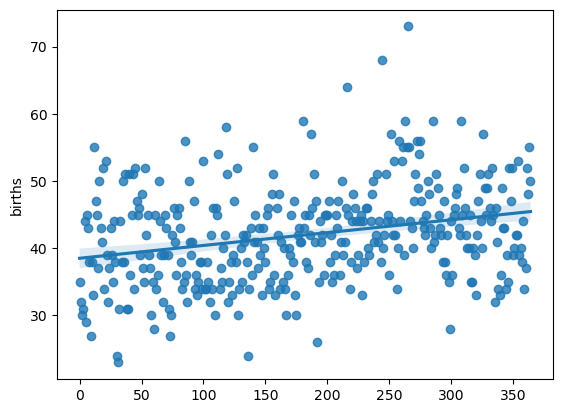

In [30]:
sns.regplot(x= df2.index.values, y=df2['births'])

<Axes: ylabel='births'>

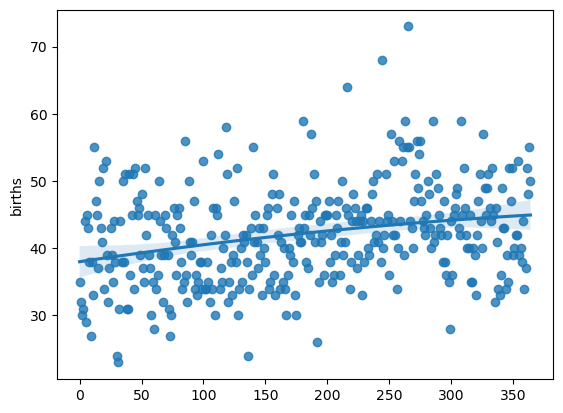

In [31]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

<Axes: ylabel='births'>

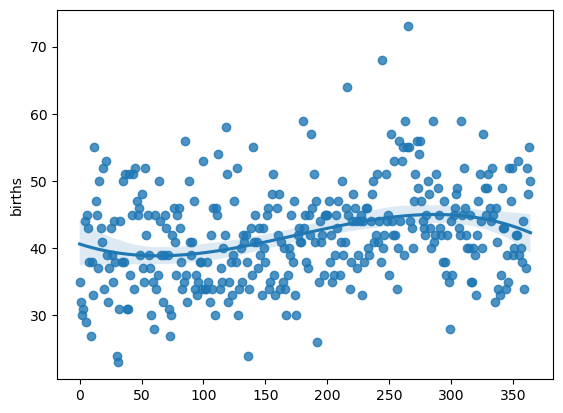

In [32]:
sns.regplot(x= df2.index.values, y=df2['births'], order =3)

In [33]:
import pandas as pd

In [34]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [35]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

<Axes: >

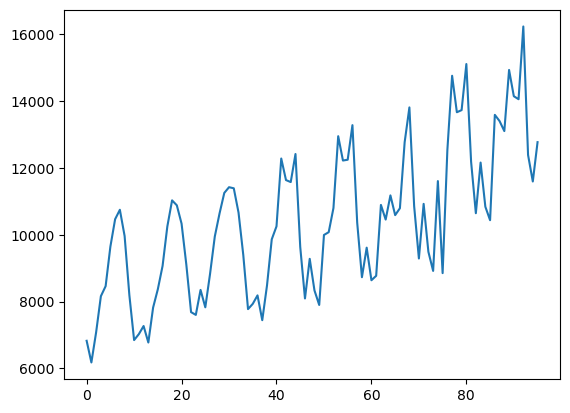

In [36]:
miles_df['MilesMM'].plot()

In [37]:
import seaborn as sns


<Axes: ylabel='MilesMM'>

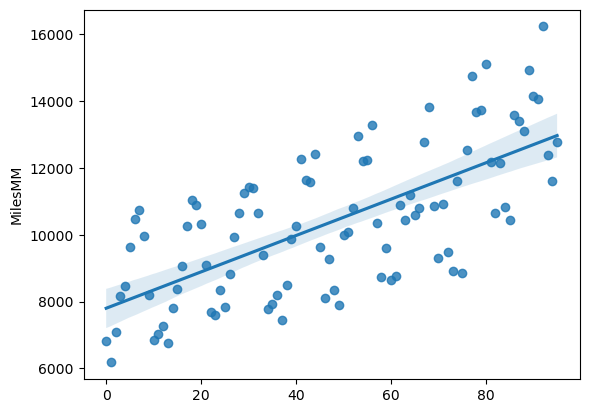

In [38]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

# Removing Seasonality

In [39]:
miles_df['year'] = miles_df['Month'].dt.year
miles_df.head()

Month  MilesMM  year
0 1963-01-01     6827  1963
1 1963-02-01     6178  1963
2 1963-03-01     7084  1963
3 1963-04-01     8162  1963
4 1963-05-01     8462  1963

In [40]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

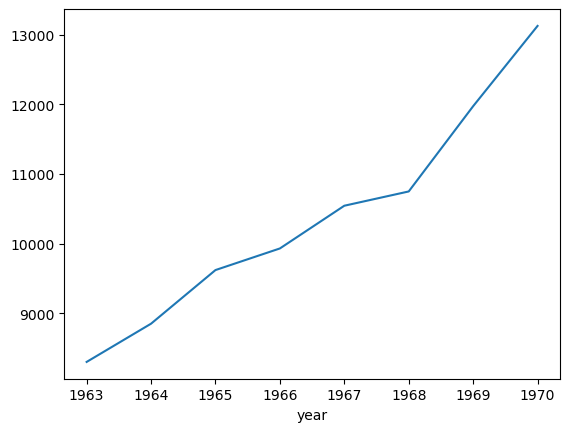

In [41]:
miles_df.groupby('year')['MilesMM'].mean().plot()

# Creating Lag plots

In [42]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [43]:
miles_df.head()

Month  MilesMM  year    lag1
0 1963-01-01     6827  1963     NaN
1 1963-02-01     6178  1963  6827.0
2 1963-03-01     7084  1963  6178.0
3 1963-04-01     8162  1963  7084.0
4 1963-05-01     8462  1963  8162.0

<Axes: xlabel='lag1', ylabel='MilesMM'>

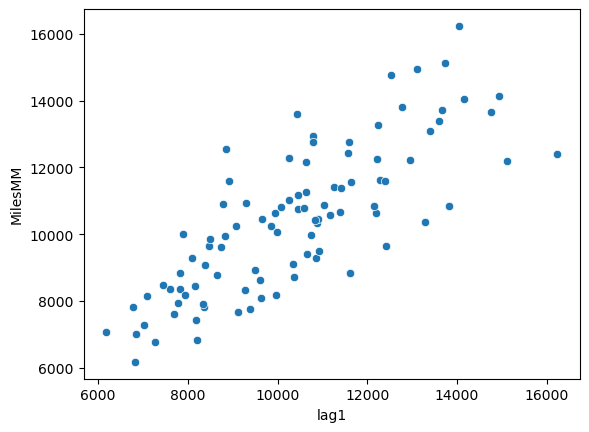

In [44]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [45]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

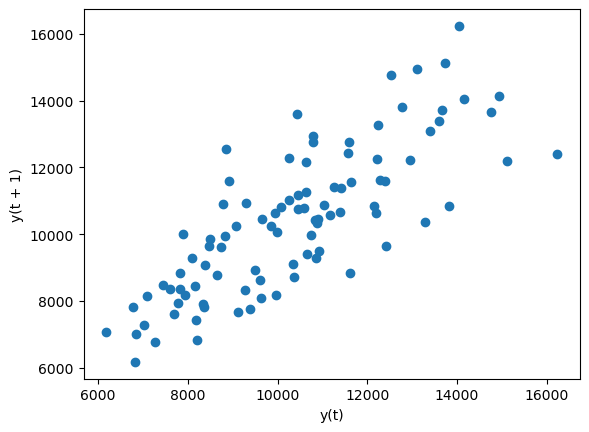

In [46]:
lag_plot(miles_df['MilesMM'])

# Autocorrelation Plots

In [47]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

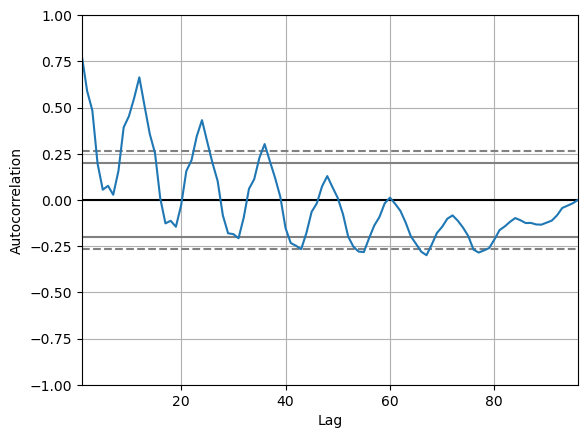

In [48]:
autocorrelation_plot(miles_df['MilesMM'])

# Downsampling and Upsampling

In [49]:
import pandas as pd

In [50]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [51]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

Downsampling

In [52]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()
quarterly_miles_df.head()

MilesMM
Month                   
1963-03-31   6696.333333
1963-06-30   8756.000000
1963-09-30  10392.333333
1963-12-31   7356.333333
1964-03-31   7287.666667

In [53]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [54]:
yearly_total_miles_df.head()

MilesMM
Month              
1963-12-31    99603
1964-12-31   106192
1965-12-31   115431
1966-12-31   119154
1967-12-31   126515

Upsampling

In [55]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [56]:
upsampled_miles_df.head(35)

MilesMM
Month              
1963-01-01   6827.0
1963-01-02      NaN
1963-01-03      NaN
1963-01-04      NaN
1963-01-05      NaN
1963-01-06      NaN
1963-01-07      NaN
1963-01-08      NaN
1963-01-09      NaN
1963-01-10      NaN
1963-01-11      NaN
1963-01-12      NaN
1963-01-13      NaN
1963-01-14      NaN
1963-01-15      NaN
1963-01-16      NaN
1963-01-17      NaN
1963-01-18      NaN
1963-01-19      NaN
1963-01-20      NaN
1963-01-21      NaN
1963-01-22      NaN
1963-01-23      NaN
1963-01-24      NaN
1963-01-25      NaN
1963-01-26      NaN
1963-01-27      NaN
1963-01-28      NaN
1963-01-29      NaN
1963-01-30      NaN
1963-01-31      NaN
1963-02-01   6178.0
1963-02-02      NaN
1963-02-03      NaN
1963-02-04      NaN

In [57]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')
interpolated_miles_df.head(32)

MilesMM
Month                  
1963-01-01  6827.000000
1963-01-02  6806.064516
1963-01-03  6785.129032
1963-01-04  6764.193548
1963-01-05  6743.258065
1963-01-06  6722.322581
1963-01-07  6701.387097
1963-01-08  6680.451613
1963-01-09  6659.516129
1963-01-10  6638.580645
1963-01-11  6617.645161
1963-01-12  6596.709677
1963-01-13  6575.774194
1963-01-14  6554.838710
1963-01-15  6533.903226
1963-01-16  6512.967742
1963-01-17  6492.032258
1963-01-18  6471.096774
1963-01-19  6450.161290
1963-01-20  6429.225806
1963-01-21  6408.290323
1963-01-22  6387.354839
1963-01-23  6366.419355
1963-01-24  6345.483871
1963-01-25  6324.548387
1963-01-26  6303.612903
1963-01-27  6282.677419
1963-01-28  6261.741935
1963-01-29  6240.806452
1963-01-30  6219.870968
1963-01-31  6198.935484
1963-02-01  6178.000000

<Axes: xlabel='Month'>

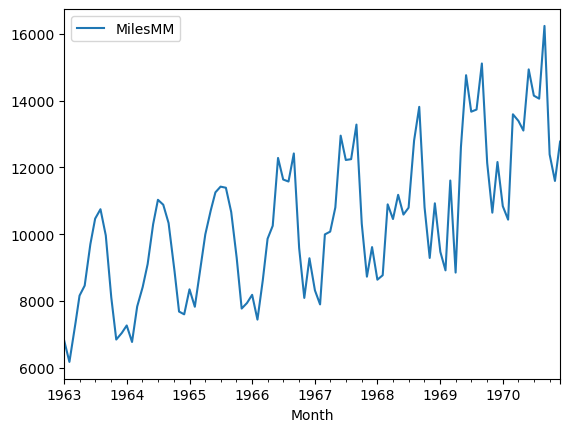

In [58]:
interpolated_miles_df.plot()

In [59]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

In [60]:
poly_interpolated_miles_df.head(35)

MilesMM
Month                  
1963-01-01  6827.000000
1963-01-02  6775.328886
1963-01-03  6725.739829
1963-01-04  6678.197709
1963-01-05  6632.702526
1963-01-06  6589.254280
1963-01-07  6547.852971
1963-01-08  6508.498600
1963-01-09  6471.191166
1963-01-10  6435.930669
1963-01-11  6402.717110
1963-01-12  6371.550488
1963-01-13  6342.430803
1963-01-14  6315.358055
1963-01-15  6290.332244
1963-01-16  6267.353371
1963-01-17  6246.421435
1963-01-18  6227.536436
1963-01-19  6210.698374
1963-01-20  6195.907250
1963-01-21  6183.163063
1963-01-22  6172.465813
1963-01-23  6163.815500
1963-01-24  6157.212125
1963-01-25  6152.655687
1963-01-26  6150.146186
1963-01-27  6149.683622
1963-01-28  6151.267995
1963-01-29  6154.899306
1963-01-30  6160.577554
1963-01-31  6168.302739
1963-02-01  6178.000000
1963-02-02  6189.893921
1963-02-03  6203.759918
1963-02-04  6219.672853

<Axes: xlabel='Month'>

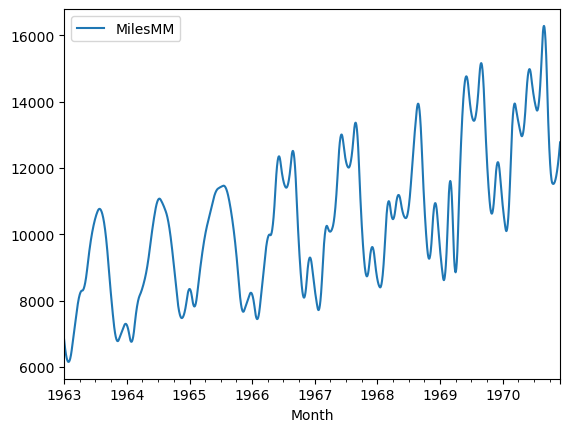

In [61]:
poly_interpolated_miles_df.plot()

# Decomposing Time Series

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [64]:
miles_decomp_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [65]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [66]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

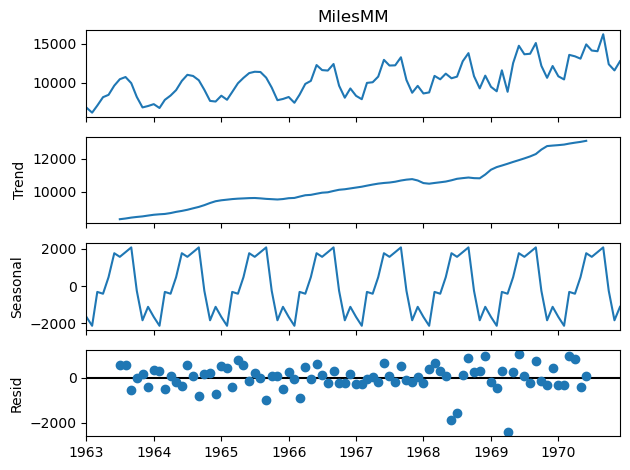

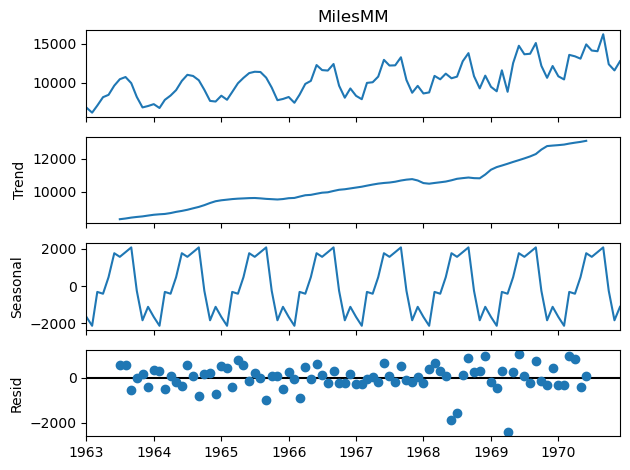

In [67]:
result.plot()

In [68]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

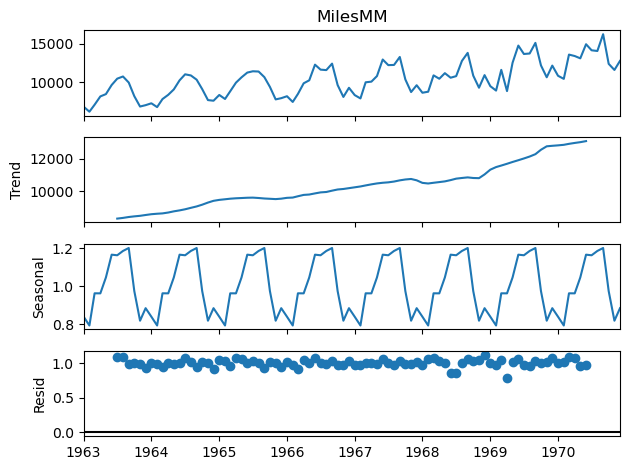

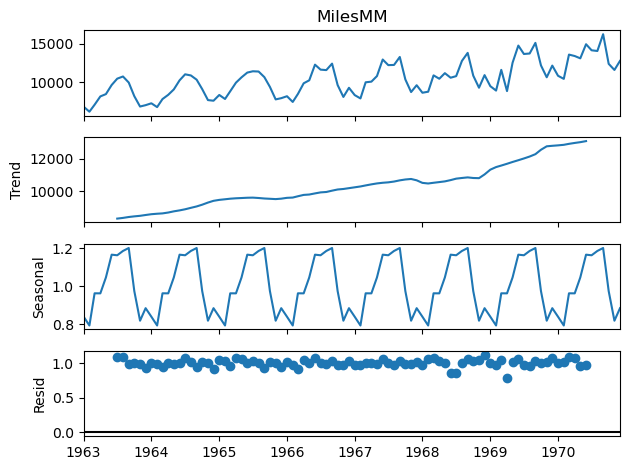

In [69]:
result2.plot()

# Differencing

In [70]:
import pandas as pd

In [71]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])


In [72]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [73]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [74]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [75]:
miles_df.head()

Month  MilesMM    lag1  MilesMM_diff_1
0 1963-01-01     6827     NaN             NaN
1 1963-02-01     6178  6827.0          -649.0
2 1963-03-01     7084  6178.0           906.0
3 1963-04-01     8162  7084.0          1078.0
4 1963-05-01     8462  8162.0           300.0

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

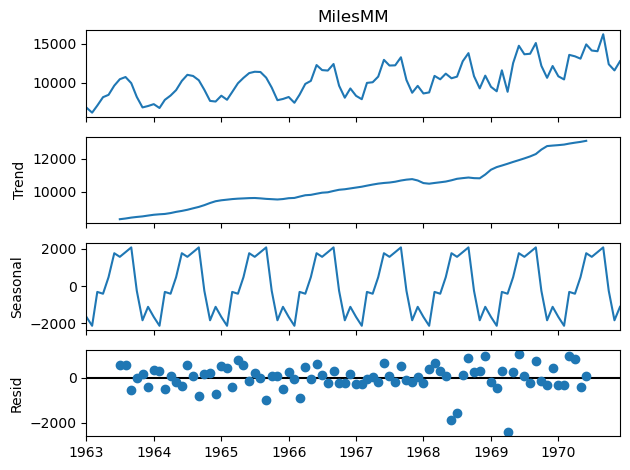

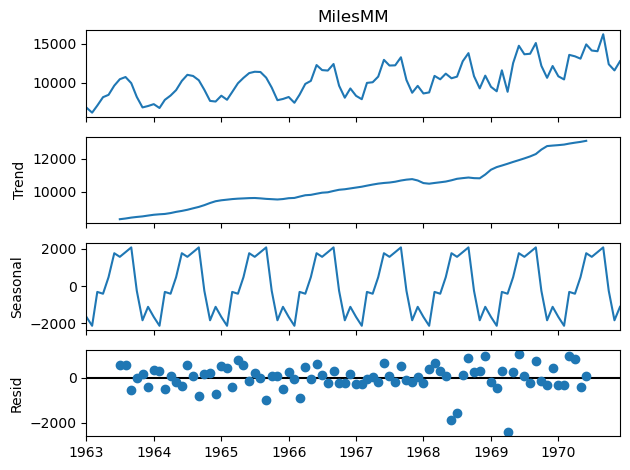

In [77]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

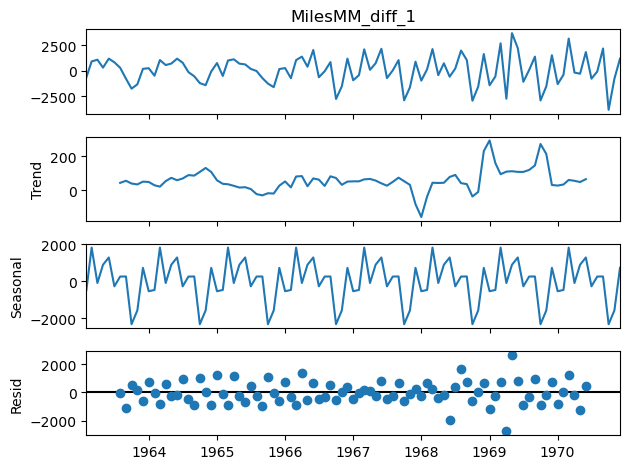

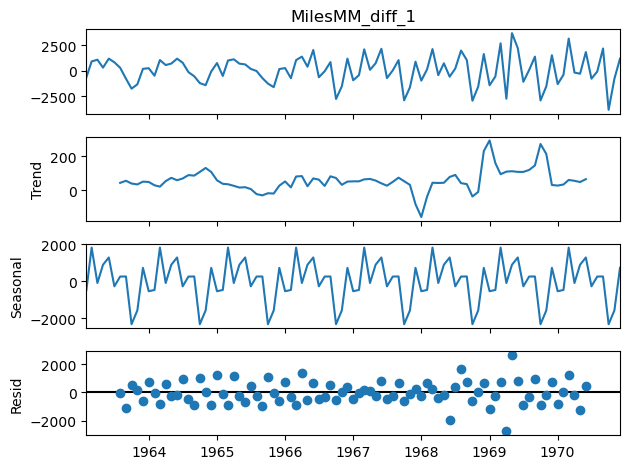

In [78]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<Axes: xlabel='Month'>

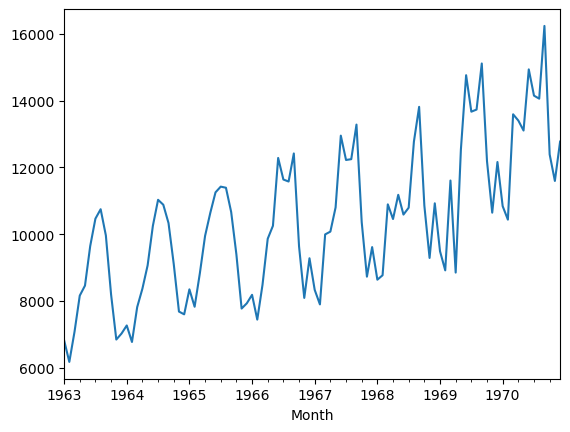

In [79]:
miles_df['MilesMM'].plot()

<Axes: xlabel='Month'>

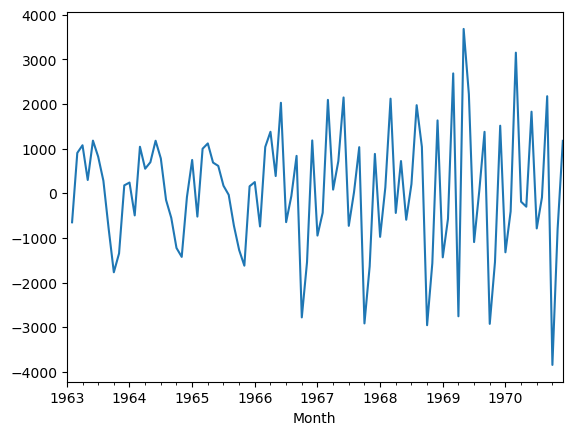

In [80]:
miles_df['MilesMM_diff_1'].plot() 

In [81]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<Axes: xlabel='Month'>

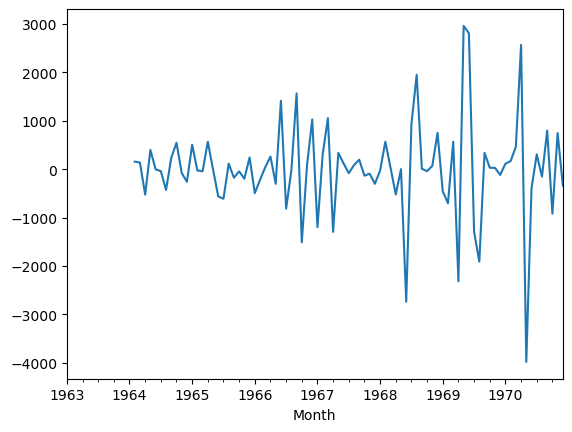

In [82]:
miles_df['MilesMM_diff_12'].plot()

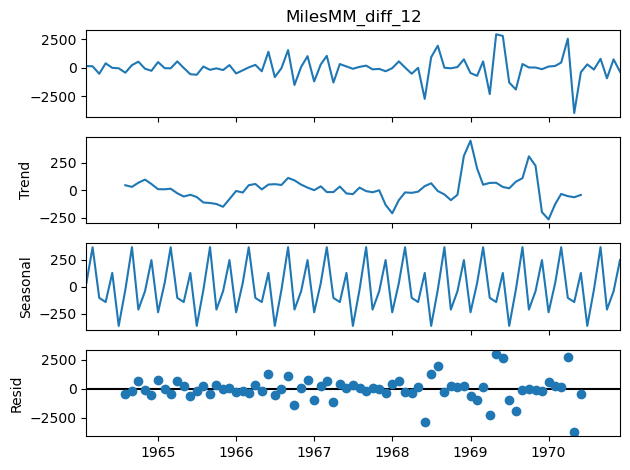

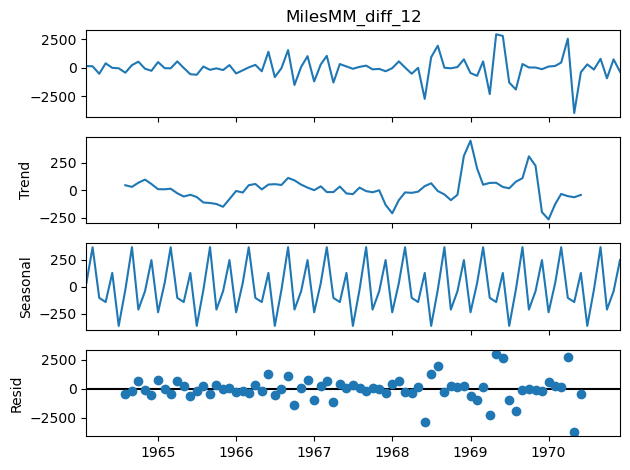

In [83]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [84]:
miles_df.head(50)

Month  MilesMM     lag1  MilesMM_diff_1  MilesMM_diff_12
Month                                                                   
1963-01-01 1963-01-01     6827      NaN             NaN              NaN
1963-02-01 1963-02-01     6178   6827.0          -649.0              NaN
1963-03-01 1963-03-01     7084   6178.0           906.0              NaN
1963-04-01 1963-04-01     8162   7084.0          1078.0              NaN
1963-05-01 1963-05-01     8462   8162.0           300.0              NaN
1963-06-01 1963-06-01     9644   8462.0          1182.0              NaN
1963-07-01 1963-07-01    10466   9644.0           822.0              NaN
1963-08-01 1963-08-01    10748  10466.0           282.0              NaN
1963-09-01 1963-09-01     9963  10748.0          -785.0              NaN
1963-10-01 1963-10-01     8194   9963.0         -1769.0              NaN
1963-11-01 1963-11-01     6848   8194.0         -1346.0              NaN
1963-12-01 1963-12-01     7027   6848.0           179.0              NaN
1964-01-01 1964-01-01     7269   7027.0           242.0              NaN
1964-02-01 1964-02-01     6775   7269.0          -494.0            155.0
1964-03-01 1964-03-01     7819   6775.0          1044.0            138.0
1964-04-01 1964-04-01     8371   7819.0           552.0           -526.0
1964-05-01 1964-05-01     9069   8371.0           698.0            398.0
1964-06-01 1964-06-01    10248   9069.0          1179.0             -3.0
1964-07-01 1964-07-01    11030  10248.0           782.0            -40.0
1964-08-01 1964-08-01    10882  11030.0          -148.0           -430.0
1964-09-01 1964-09-01    10333  10882.0          -549.0            236.0
1964-10-01 1964-10-01     9109  10333.0         -1224.0            545.0
1964-11-01 1964-11-01     7685   9109.0         -1424.0            -78.0
1964-12-01 1964-12-01     7602   7685.0           -83.0           -262.0
1965-01-01 1965-01-01     8350   7602.0           748.0            506.0
1965-02-01 1965-02-01     7829   8350.0          -521.0            -27.0
1965-03-01 1965-03-01     8829   7829.0          1000.0            -44.0
1965-04-01 1965-04-01     9948   8829.0          1119.0            567.0
1965-05-01 1965-05-01    10638   9948.0           690.0             -8.0
1965-06-01 1965-06-01    11253  10638.0           615.0           -564.0
1965-07-01 1965-07-01    11424  11253.0           171.0           -611.0
1965-08-01 1965-08-01    11391  11424.0           -33.0            115.0
1965-09-01 1965-09-01    10665  11391.0          -726.0           -177.0
1965-10-01 1965-10-01     9396  10665.0         -1269.0            -45.0
1965-11-01 1965-11-01     7775   9396.0         -1621.0           -197.0
1965-12-01 1965-12-01     7933   7775.0           158.0            241.0
1966-01-01 1966-01-01     8186   7933.0           253.0           -495.0
1966-02-01 1966-02-01     7444   8186.0          -742.0           -221.0
1966-03-01 1966-03-01     8484   7444.0          1040.0             40.0
1966-04-01 1966-04-01     9864   8484.0          1380.0            261.0
1966-05-01 1966-05-01    10252   9864.0           388.0           -302.0
1966-06-01 1966-06-01    12282  10252.0          2030.0           1415.0
1966-07-01 1966-07-01    11637  12282.0          -645.0           -816.0
1966-08-01 1966-08-01    11577  11637.0           -60.0            -27.0
1966-09-01 1966-09-01    12417  11577.0           840.0           1566.0
1966-10-01 1966-10-01     9637  12417.0         -2780.0          -1511.0
1966-11-01 1966-11-01     8094   9637.0         -1543.0             78.0
1966-12-01 1966-12-01     9280   8094.0          1186.0           1028.0
1967-01-01 1967-01-01     8334   9280.0          -946.0          -1199.0
1967-02-01 1967-02-01     7899   8334.0          -435.0            307.0

# Test-Train Split

In [85]:
import pandas as pd

In [86]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])
temp_df.head()

Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8

In [87]:
temp_df.tail()

Date  Temp
3645 1990-12-27  14.0
3646 1990-12-28  13.6
3647 1990-12-29  13.5
3648 1990-12-30  15.7
3649 1990-12-31  13.0

In [88]:
temp_df.shape

(3650, 2)

In [89]:
temp_df.shape[0]

3650

In [90]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [91]:
train =  temp_df[0:train_size]
test =  temp_df[train_size:]

In [92]:
train.shape

(2920, 2)

In [93]:
test.shape

(730, 2)

# Persistence Model

In [94]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [95]:
df.head()

Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8

In [96]:
df['t'] =  df['Temp'].shift(1)

In [97]:
df.head()

Date  Temp     t
0 1981-01-01  20.7   NaN
1 1981-01-02  17.9  20.7
2 1981-01-03  18.8  17.9
3 1981-01-04  14.6  18.8
4 1981-01-05  15.8  14.6

In [98]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [99]:
train.head()

Date  Temp     t
1 1981-01-02  17.9  20.7
2 1981-01-03  18.8  17.9
3 1981-01-04  14.6  18.8
4 1981-01-05  15.8  14.6
5 1981-01-06  15.8  15.8

In [100]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

# walk-forward validation

In [101]:
predictions = test_X.copy()
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [103]:
from matplotlib import pyplot

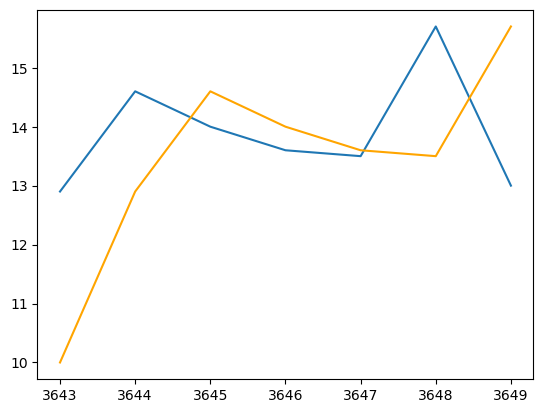

In [104]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='orange')

# Autoregression Model

In [105]:
import pandas as pd

In [106]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [107]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [108]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [109]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train,lags=29)
model_fit = model.fit()


No. of lag Variables

In [110]:
model_fit.model.ar_lags


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

Coef of lag variables

In [111]:
model_fit.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [112]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [113]:
predictions

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649          NaN
dtype: float64

In [114]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)).dropna()

In [115]:
print(predictions, '\n')

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649    13.376567
dtype: float64 



In [116]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.232961203346289

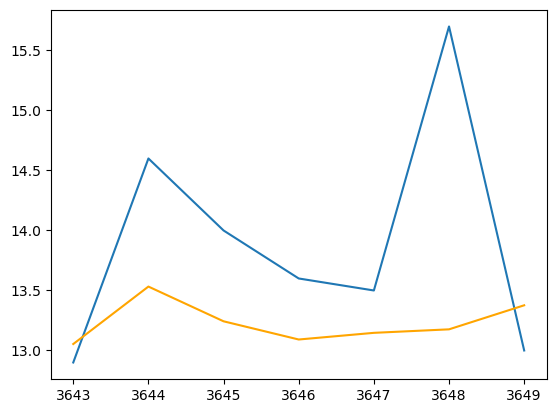

In [117]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='orange')

Walk Forward

In [118]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [119]:
import numpy as np

In [120]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [121]:
data = train
predict =[]
for t in test:
    model = AutoReg(data,lags=29)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

13.053794217229802
13.66069994383518
14.353164144090172
13.430120791626962
13.374756477185107
13.479111299420516
14.76777301843987


In [122]:
predict

[13.053794217229802,
 13.66069994383518,
 14.353164144090172,
 13.430120791626962,
 13.374756477185107,
 13.479111299420516,
 14.76777301843987]

In [123]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.3046535885665247

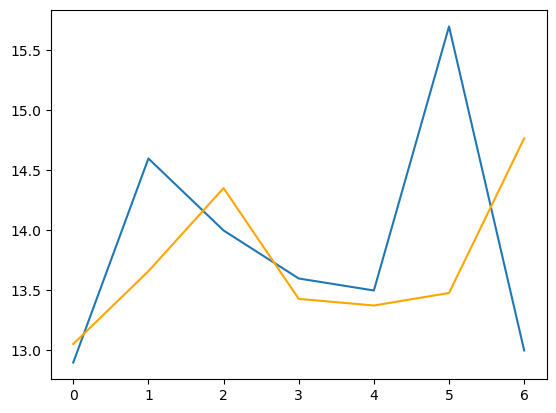

In [124]:
pyplot.plot(test.values)
pyplot.plot(predict, color='orange')

# Moving Average Model

In [125]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [126]:
df['t'] =  df['Temp'].shift(1)

In [127]:
df['Resid'] = df['Temp'] - df['t']

In [128]:
df.head()

Date  Temp     t  Resid
0 1981-01-01  20.7   NaN    NaN
1 1981-01-02  17.9  20.7   -2.8
2 1981-01-03  18.8  17.9    0.9
3 1981-01-04  14.6  18.8   -4.2
4 1981-01-05  15.8  14.6    1.2

In [129]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [130]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [131]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(train,lags=29)
model_fit=model.fit()

In [132]:
pred_resid=model_fit.predict(start=len(train), end=len(train)+len(test)).dropna()

In [133]:
pred_resid

3643    1.264192
3644    0.510869
3645   -0.251687
3646   -0.122054
3647    0.077509
3648    0.055600
3649    0.229926
dtype: float64

In [134]:
predictions= df.t[df.shape[0]-7:] + pred_resid

In [135]:
predictions

3643    11.264192
3644    13.410869
3645    14.348313
3646    13.877946
3647    13.677509
3648    13.555600
3649    15.929926
dtype: float64

In [136]:
mse=mean_squared_error(test_y, predictions)
mse

2.5004146291117246

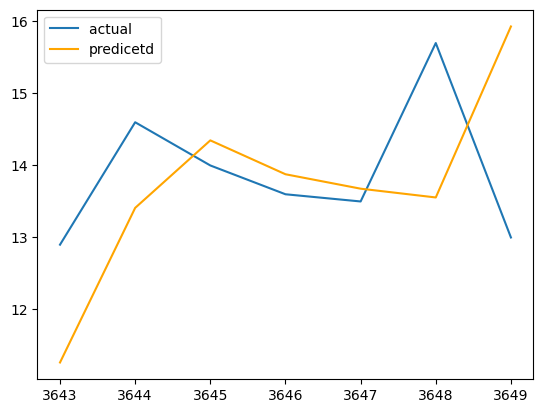

In [137]:
line1,=plt.plot(test_y,label='actual ')
line2,=plt.plot(predictions, color='orange',label='predicetd')
plt.legend(handles=[line1, line2])

# ARIMA Model

In [138]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

C:\Users\priya\AppData\Local\Temp\ipykernel_3516\3083933742.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])


In [139]:
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

<Axes: >

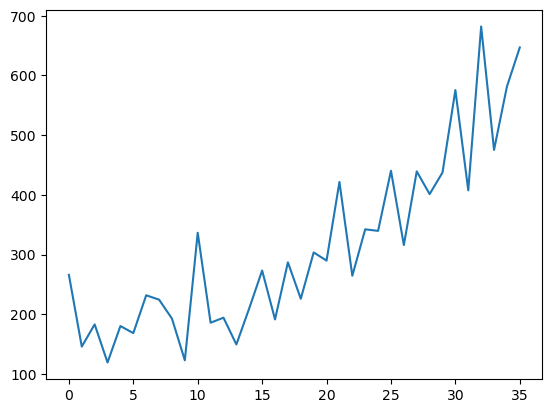

In [140]:
df['Sales'].plot()

d=2

# Autocorrelation Plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

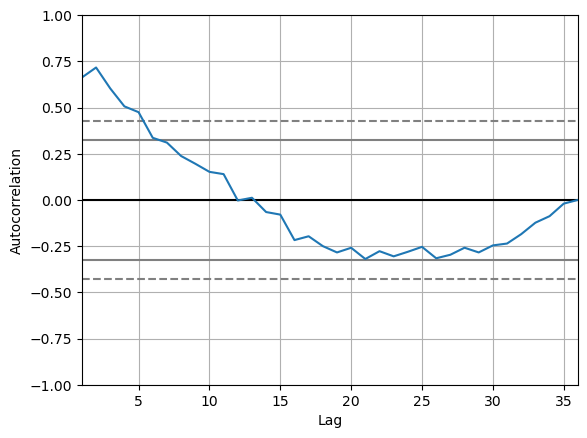

In [141]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

q=5

# Partial Autocorrelation Graph

In [142]:
from statsmodels.graphics.tsaplots import plot_pacf

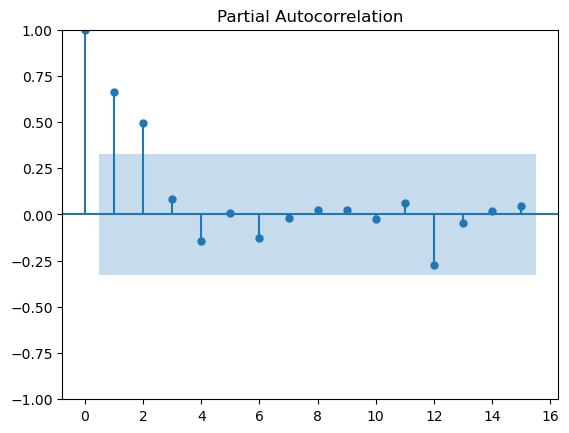

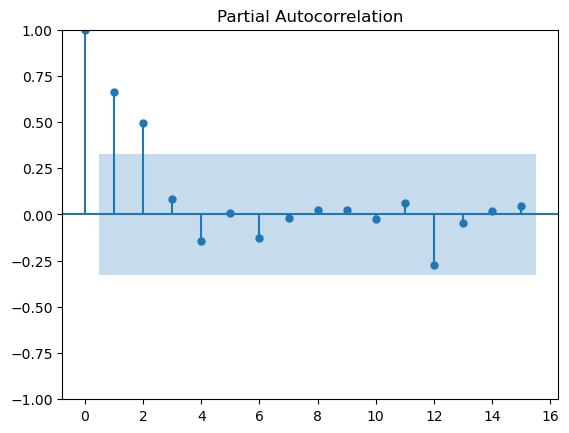

In [143]:
plot_pacf(df['Sales'], lags=15)

p=2

In [144]:
from statsmodels.tsa.arima.model import ARIMA

In [145]:
model = ARIMA(df['Sales'], order=(5,2,2))
model_fit = model.fit()


C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [146]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -191.901
Date:                Thu, 15 Feb 2024   AIC                            399.801
Time:                        19:45:39   BIC                            412.012
Sample:                             0   HQIC                           403.966
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2741      3.066     -0.416      0.678      -7.283       4.735
ar.L2         -0.9934      3.912     -0.254      0.800      -8.661       6.674
ar.L3         -0.8128      2.923     -0.278      0.781      -6.542       4.917
ar.L4         -0.5075      2.312     -0.220      0.826      -5.038       4.023
ar.L5         -0.0803      1.328     -0.060      0.952      -2.684       2.523
ma.L1         -0.8519      3.156     -0.270      0.787      -7.037       5.333
ma.L2          0.0832      2.548      0.033      0.974      -4.910       5.077
sigma2      3996.2473   1308.563      3.054      0.002    1431.512    6560.983
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.72   Prob(JB):                         0.81
Heteroskedasticity (H):               0.94   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
residuals = model_fit.resid

<Axes: >

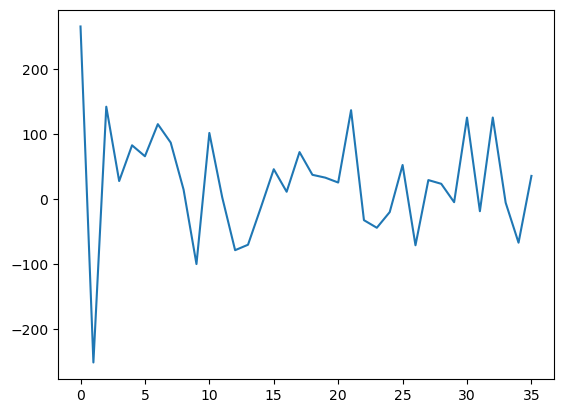

In [148]:
residuals.plot()

In [149]:
residuals.describe()

count     36.000000
mean      24.806047
std       88.931498
min     -251.238807
25%      -18.718287
50%       26.920286
75%       75.248604
max      266.000000
dtype: float64

In [150]:
output = model_fit.forecast()

In [151]:
output

36    608.240315
dtype: float64

In [152]:
model_fit.forecast(5)

36    608.240315
37    700.069330
38    641.957560
39    725.401618
40    727.544082
Name: predicted_mean, dtype: float64

# Walk Forward ARIMA

In [153]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

C:\Users\priya\AppData\Local\Temp\ipykernel_3516\3083933742.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])


In [154]:
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

In [155]:
train_size = int(df.shape[0]*0.7)

In [156]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [157]:
train.shape

(25,)

In [ ]:
test.shape

In [159]:
data=train
predict=[]
for t in test:
  model=ARIMA(data, order=(5,1,0))
  model_fit=model.fit()
  y=model_fit.forecast()
  print(y.values)
  predict.append(y.values)
  data = np.append(data,t)
  data=pd.Series(data)  

[368.66895566]
[335.04474071]
[363.22022159]
[357.6453236]
[443.04783529]
[378.36567356]
[459.41502062]
[526.89087568]
[457.23127485]
[672.91494293]
[531.54144898]


In [160]:
predict

[array([368.66895566]),
 array([335.04474071]),
 array([363.22022159]),
 array([357.6453236]),
 array([443.04783529]),
 array([378.36567356]),
 array([459.41502062]),
 array([526.89087568]),
 array([457.23127485]),
 array([672.91494293]),
 array([531.54144898])]

In [161]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test.values, predict)

In [162]:
mse

9170.052424869784

# SARIMA or Seasonal ARIMA

In [163]:
import pandas as pd

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [165]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [166]:
df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [167]:
df.tail()

Month  MilesMM
91 1970-08-01    14057
92 1970-09-01    16234
93 1970-10-01    12389
94 1970-11-01    11595
95 1970-12-01    12772

In [168]:
df.index = df['Month'] 

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose

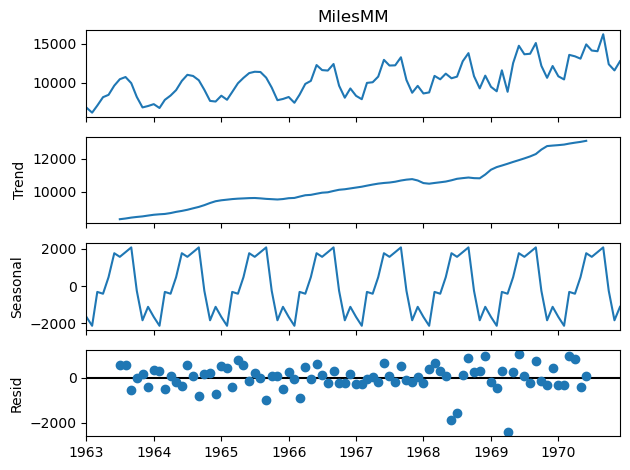

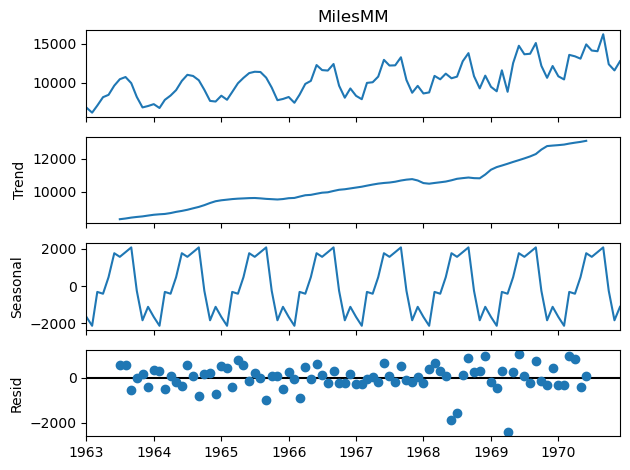

In [170]:
result_a = seasonal_decompose(df['MilesMM'], model='additive')
result_a.plot()

In [171]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [172]:
model_fit = model.fit()

C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [173]:
residuals = model_fit.resid

<Axes: xlabel='Month'>

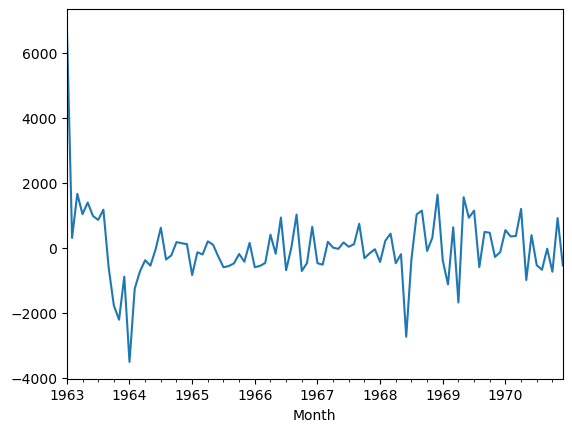

In [174]:
residuals.plot()

In [175]:
output = model_fit.forecast()

In [176]:
output

1971-01-01    11475.317447
Freq: MS, dtype: float64

In [177]:
model_fit.forecast(12)

1971-01-01    11475.317447
1971-02-01    11153.441198
1971-03-01    13668.981815
1971-04-01    12646.726971
1971-05-01    14338.941426
1971-06-01    15785.731682
1971-07-01    14978.616271
1971-08-01    15362.243913
1971-09-01    16962.324645
1971-10-01    13681.931707
1971-11-01    12426.568472
1971-12-01    13729.597716
Freq: MS, Name: predicted_mean, dtype: float64

In [178]:
yhat = model_fit.predict()

In [179]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.491160
1963-03-01    5421.090523
1963-04-01    7123.450703
1963-05-01    7066.433929
Freq: MS, Name: predicted_mean, dtype: float64

In [180]:
import matplotlib.pyplot as pyplot


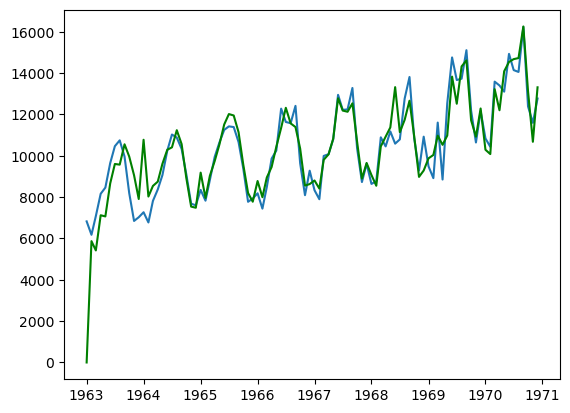

In [181]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='green')

# EDD on House price data

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

In [183]:
df=pd.read_csv('House_Price.csv',header=0)

In [184]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0   4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1   5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2   5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3   6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4   6.37   5.86      21.3       5.33      NO       8.824      11.2896   

  waterbody  rainfall bus_ter     parks  
0     River        23     YES  0.049347  
1      Lake        42     YES  0.046146  
2       NaN        38     YES  0.045764  
3      Lake        45     YES  0.047151  
4      Lake        55     YES  0.039474

In [185]:
df.shape

(506, 19)

In [186]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   41.136779    0.554695    6.284634   68.574901   
std      9.182176    8.601545    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006320   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.082045   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.256510   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    3.677083   48.100000    0.624000    6.623500   94.075000   
max     50.000000   88.976200   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks  
count  498.000000   506.000000  506.000000  506.000000  
mean     7.899767    13.041605   39.181818    0.054454  
std      1.476683     5.238957   12.513697    0.010632  
min      5.268000    10.057600    3.000000    0.033292  
25%      6.634500    11.189800   28.000000    0.046464  
50%      7.999000    12.720000   39.000000    0.053507  
75%      9.088000    14.170800   50.000000    0.061397  
max     10.876000   101.120000   60.000000    0.086711

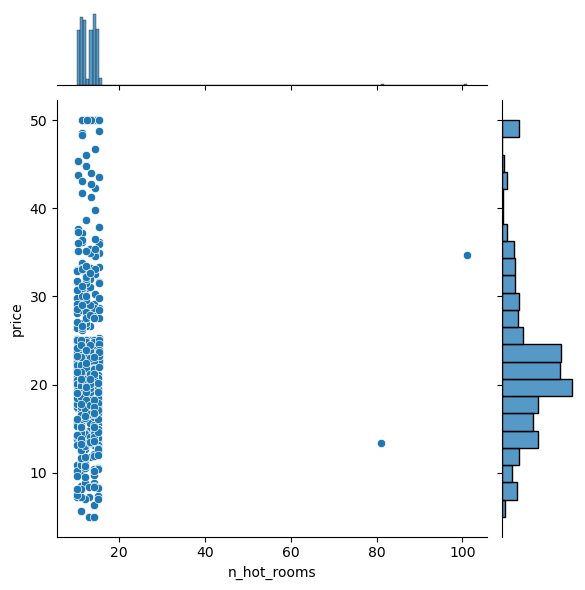

In [187]:
sns.jointplot(x="n_hot_rooms", y="price", data=df)

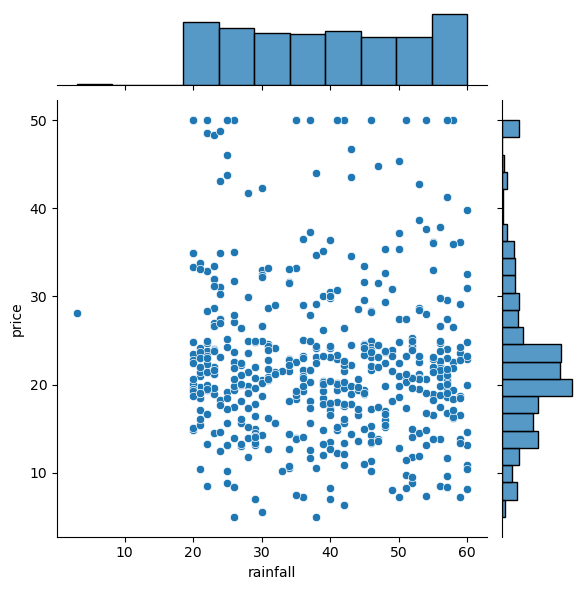

In [188]:
sns.jointplot(x="rainfall", y="price", data=df)

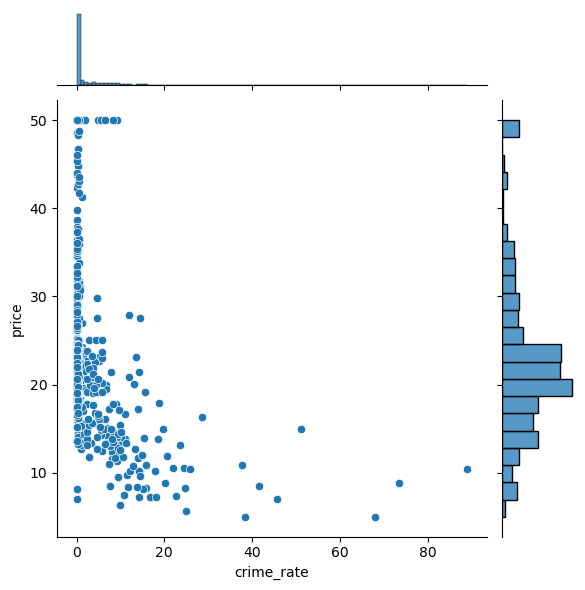

In [189]:
sns.jointplot(x="crime_rate", y="price", data=df)

<Axes: xlabel='airport', ylabel='count'>

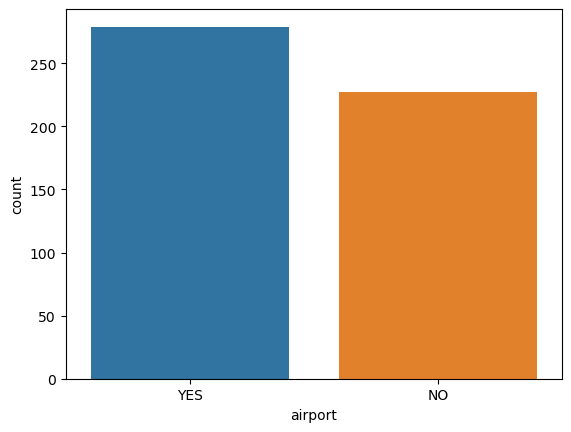

In [190]:
sns.countplot(x="airport", data=df)

<Axes: xlabel='waterbody', ylabel='count'>

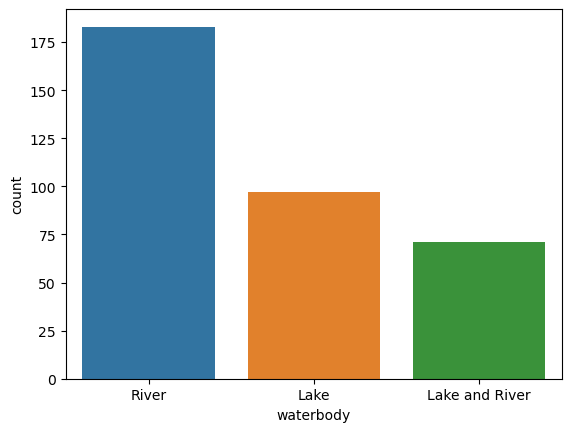

In [191]:
sns.countplot(x="waterbody", data=df)

<Axes: xlabel='bus_ter', ylabel='count'>

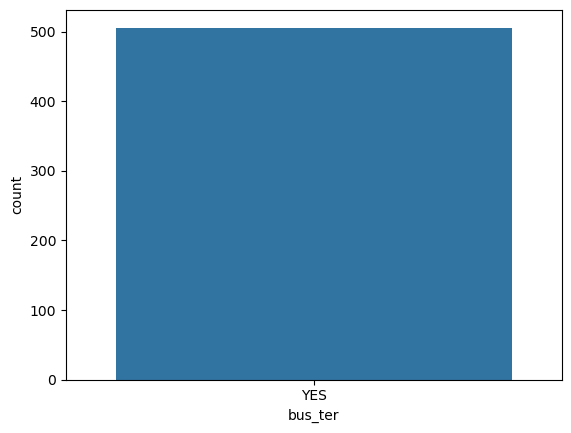

In [192]:
sns.countplot(x="bus_ter", data=df)

# Outlier treatement

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [194]:
upper_limit=np.percentile(df.n_hot_rooms, [99])[0]

In [195]:
upper_limit

15.39952

In [196]:
df[(df.n_hot_rooms> upper_limit)]

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
2     34.7     0.02729       37.07    0.4690     7.185  61.1   5.03   4.86   
166   50.0     2.01019       49.58    0.6050     7.929  96.2   2.11   1.91   
204   50.0     0.02009       32.68    0.4161     8.034  31.9   5.41   4.80   
267   50.0     0.57834       33.97    0.5750     8.297  67.0   2.60   2.13   
369   50.0     5.66998       48.10    0.6310     6.683  96.8   1.55   1.28   
423   13.4     7.05042       48.10    0.6140     6.103  85.1   2.08   1.80   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
2     5.01   4.97      22.2       4.03      NO       7.394       101.12   
166   2.31   1.86      25.3       3.70     YES       8.300        15.40   
204   5.28   4.99      25.3       2.88     YES       8.900        15.40   
267   2.43   2.52      27.0       7.44     YES       8.000        15.40   
369   1.65   0.94      19.8       3.73     YES       6.700        15.40   
423   2.34   1.87      19.8      23.29      NO       8.268        81.12   

    waterbody  rainfall bus_ter     parks  
2         NaN        38     YES  0.045764  
166     River        37     YES  0.052105  
204     River        51     YES  0.044178  
267       NaN        42     YES  0.063235  
369     River        58     YES  0.067477  
423      Lake        29     YES  0.063344

In [197]:
df.n_hot_rooms[(df.n_hot_rooms > 3*upper_limit)]=3*upper_limit

C:\Users\priya\AppData\Local\Temp\ipykernel_3516\1055211317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*upper_limit)]=3*upper_limit


In [198]:
lv=np.percentile(df.rainfall, [1])[0]

In [199]:
lv

20.0

In [200]:
df[(df.rainfall <lv)]

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
213   28.1     0.14052       40.59     0.489     6.375  32.3   4.11   3.92   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
213   4.18   3.57      21.4       9.38     YES       7.562      10.2248   

    waterbody  rainfall bus_ter     parks  
213       NaN         3     YES  0.044019

In [201]:
df.rainfall[(df.rainfall <0.3*lv)]=0.3*lv

C:\Users\priya\AppData\Local\Temp\ipykernel_3516\2103433384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall <0.3*lv)]=0.3*lv


In [202]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   41.136779    0.554695    6.284634   68.574901   
std      9.182176    8.601545    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006320   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.082045   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.256510   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    3.677083   48.100000    0.624000    6.623500   94.075000   
max     50.000000   88.976200   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks  
count  498.000000   506.000000  506.000000  506.000000  
mean     7.899767    12.864050   39.187747    0.054454  
std      1.476683     2.688778   12.497221    0.010632  
min      5.268000    10.057600    6.000000    0.033292  
25%      6.634500    11.189800   28.000000    0.046464  
50%      7.999000    12.720000   39.000000    0.053507  
75%      9.088000    14.170800   50.000000    0.061397  
max     10.876000    46.198560   60.000000    0.086711

# missing values treatement in hospital beds

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [204]:
df.isnull().sum()

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       8
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64

In [205]:
df.n_hos_beds=df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [206]:
df.isnull().sum()

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       0
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64

# Data Transformation

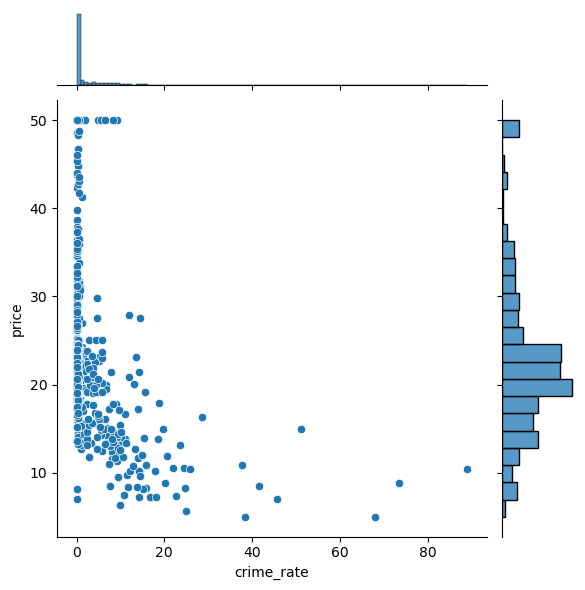

In [207]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [208]:
df.crime_rate=np.log(1+df.crime_rate)

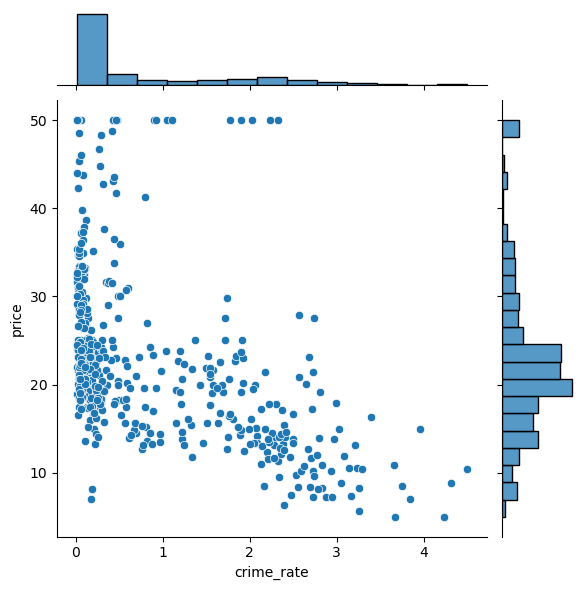

In [209]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [210]:
df["average"]=(df.dist1+df.dist2+df.dist3+df.dist4)/4

In [211]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0   4.18   4.01      24.7       4.98     YES       5.480     11.19200   
1   5.12   5.06      22.2       9.14      NO       7.332     12.17280   
2   5.01   4.97      22.2       4.03      NO       7.394     46.19856   
3   6.16   5.96      21.3       2.94     YES       9.268     11.26720   
4   6.37   5.86      21.3       5.33      NO       8.824     11.28960   

  waterbody  rainfall bus_ter     parks  average  
0     River        23     YES  0.049347   4.0875  
1      Lake        42     YES  0.046146   4.9675  
2       NaN        38     YES  0.045764   4.9675  
3      Lake        45     YES  0.047151   6.0650  
4      Lake        55     YES  0.039474   6.0625

In [212]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    0.813418   41.136779    0.554695    6.284634   68.574901   
std      9.182176    1.022731    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006300   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.078853   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.228336   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    1.542674   48.100000    0.624000    6.623500   94.075000   
max     50.000000    4.499545   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks     average  
count  506.000000   506.000000  506.000000  506.000000  506.000000  
mean     7.899767    12.864050   39.187747    0.054454    3.795104  
std      1.464939     2.688778   12.497221    0.010632    2.105859  
min      5.268000    10.057600    6.000000    0.033292    1.127500  
25%      6.659000    11.189800   28.000000    0.046464    2.100625  
50%      7.963000    12.720000   39.000000    0.053507    3.207500  
75%      9.076000    14.170800   50.000000    0.061397    5.187500  
max     10.876000    46.198560   60.000000    0.086711   12.127500

In [213]:
del df["dist4"]

In [214]:
del df["bus_ter"]

In [215]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  \
0   4.18      24.7       4.98     YES       5.480     11.19200     River   
1   5.12      22.2       9.14      NO       7.332     12.17280      Lake   
2   5.01      22.2       4.03      NO       7.394     46.19856       NaN   
3   6.16      21.3       2.94     YES       9.268     11.26720      Lake   
4   6.37      21.3       5.33      NO       8.824     11.28960      Lake   

   rainfall     parks  average  
0        23  0.049347   4.0875  
1        42  0.046146   4.9675  
2        38  0.045764   4.9675  
3        45  0.047151   6.0650  
4        55  0.039474   6.0625

# Dummy Variables

In [216]:
df=pd.get_dummies(df)

In [217]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  teachers  ...  n_hos_beds  n_hot_rooms  rainfall     parks  average  \
0   4.18      24.7  ...       5.480     11.19200        23  0.049347   4.0875   
1   5.12      22.2  ...       7.332     12.17280        42  0.046146   4.9675   
2   5.01      22.2  ...       7.394     46.19856        38  0.045764   4.9675   
3   6.16      21.3  ...       9.268     11.26720        45  0.047151   6.0650   
4   6.37      21.3  ...       8.824     11.28960        55  0.039474   6.0625   

   airport_NO  airport_YES  waterbody_Lake  waterbody_Lake and River  \
0       False         True           False                     False   
1        True        False            True                     False   
2        True        False           False                     False   
3       False         True            True                     False   
4        True        False            True                     False   

   waterbody_River  
0             True  
1            False  
2            False  
3            False  
4            False  

[5 rows x 21 columns]

In [218]:
del df["airport_NO"]

In [219]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  teachers  poor_prop  n_hos_beds  n_hot_rooms  rainfall     parks  \
0   4.18      24.7       4.98       5.480     11.19200        23  0.049347   
1   5.12      22.2       9.14       7.332     12.17280        42  0.046146   
2   5.01      22.2       4.03       7.394     46.19856        38  0.045764   
3   6.16      21.3       2.94       9.268     11.26720        45  0.047151   
4   6.37      21.3       5.33       8.824     11.28960        55  0.039474   

   average  airport_YES  waterbody_Lake  waterbody_Lake and River  \
0   4.0875         True           False                     False   
1   4.9675        False            True                     False   
2   4.9675        False           False                     False   
3   6.0650         True            True                     False   
4   6.0625        False            True                     False   

   waterbody_River  
0             True  
1            False  
2            False  
3            False  
4            False

# Correlation analysis

In [220]:
df.corr()

price  crime_rate  resid_area  air_qual  \
price                     1.000000   -0.466527   -0.484754 -0.429300   
crime_rate               -0.466527    1.000000    0.660283  0.707587   
resid_area               -0.484754    0.660283    1.000000  0.763651   
air_qual                 -0.429300    0.707587    0.763651  1.000000   
room_num                  0.696304   -0.288784   -0.391676 -0.302188   
age                      -0.377999    0.559591    0.644779  0.731470   
dist1                     0.251355   -0.587703   -0.706481 -0.768589   
dist2                     0.249459   -0.586127   -0.707956 -0.769724   
dist3                     0.246650   -0.587988   -0.707566 -0.769157   
teachers                  0.505655   -0.390052   -0.383248 -0.188933   
poor_prop                -0.740836    0.608970    0.603800  0.590879   
n_hos_beds                0.108880   -0.004089    0.005799 -0.049553   
n_hot_rooms               0.017007    0.056570   -0.003761  0.007238   
rainfall                 -0.047200    0.082151    0.055845  0.091956   
parks                    -0.391574    0.638951    0.707635  0.915544   
average                   0.249289   -0.586371   -0.708022 -0.769247   
airport_YES               0.182867   -0.134486   -0.115401 -0.073903   
waterbody_Lake            0.036233   -0.025390   -0.026590 -0.046393   
waterbody_Lake and River -0.037497    0.009076    0.051649  0.013849   
waterbody_River           0.071751   -0.060099   -0.098976 -0.037772   

                          room_num       age     dist1     dist2     dist3  \
price                     0.696304 -0.377999  0.251355  0.249459  0.246650   
crime_rate               -0.288784  0.559591 -0.587703 -0.586127 -0.587988   
resid_area               -0.391676  0.644779 -0.706481 -0.707956 -0.707566   
air_qual                 -0.302188  0.731470 -0.768589 -0.769724 -0.769157   
room_num                  1.000000 -0.240265  0.208464  0.203981  0.201907   
age                      -0.240265  1.000000 -0.746904 -0.746493 -0.747021   
dist1                     0.208464 -0.746904  1.000000  0.997905  0.997735   
dist2                     0.203981 -0.746493  0.997905  1.000000  0.998097   
dist3                     0.201907 -0.747021  0.997735  0.998097  1.000000   
teachers                  0.355501 -0.261515  0.232834  0.233707  0.233588   
poor_prop                -0.613808  0.602339 -0.498823 -0.495693 -0.494290   
n_hos_beds                0.032009 -0.021012 -0.030365 -0.031071 -0.028315   
n_hot_rooms               0.014583  0.013918 -0.025398 -0.021263 -0.019994   
rainfall                 -0.064718  0.074684 -0.036812 -0.037990 -0.041475   
parks                    -0.282817  0.673850 -0.706319 -0.708237 -0.709346   
average                   0.205241 -0.747906  0.998933  0.999007  0.998998   
airport_YES               0.163774  0.005101  0.025208  0.020056  0.020195   
waterbody_Lake           -0.004195  0.003452  0.035171  0.038965  0.033510   
waterbody_Lake and River  0.010554 -0.004354 -0.023236 -0.024103 -0.023102   
waterbody_River           0.046251 -0.088609  0.030763  0.030566  0.033634   

                          teachers  poor_prop  n_hos_beds  n_hot_rooms  \
price                     0.505655  -0.740836    0.108880     0.017007   
crime_rate               -0.390052   0.608970   -0.004089     0.056570   
resid_area               -0.383248   0.603800    0.005799    -0.003761   
air_qual                 -0.188933   0.590879   -0.049553     0.007238   
room_num                  0.355501  -0.613808    0.032009     0.014583   
age                      -0.261515   0.602339   -0.021012     0.013918   
dist1                     0.232834  -0.498823   -0.030365    -0.025398   
dist2                     0.233707  -0.495693   -0.031071    -0.021263   
dist3                     0.233588  -0.494290   -0.028315    -0.019994   
teachers                  1.000000  -0.374044   -0.008056    -0.037007   
poor_prop                -0.374044   1.000000   -0.066008     0

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


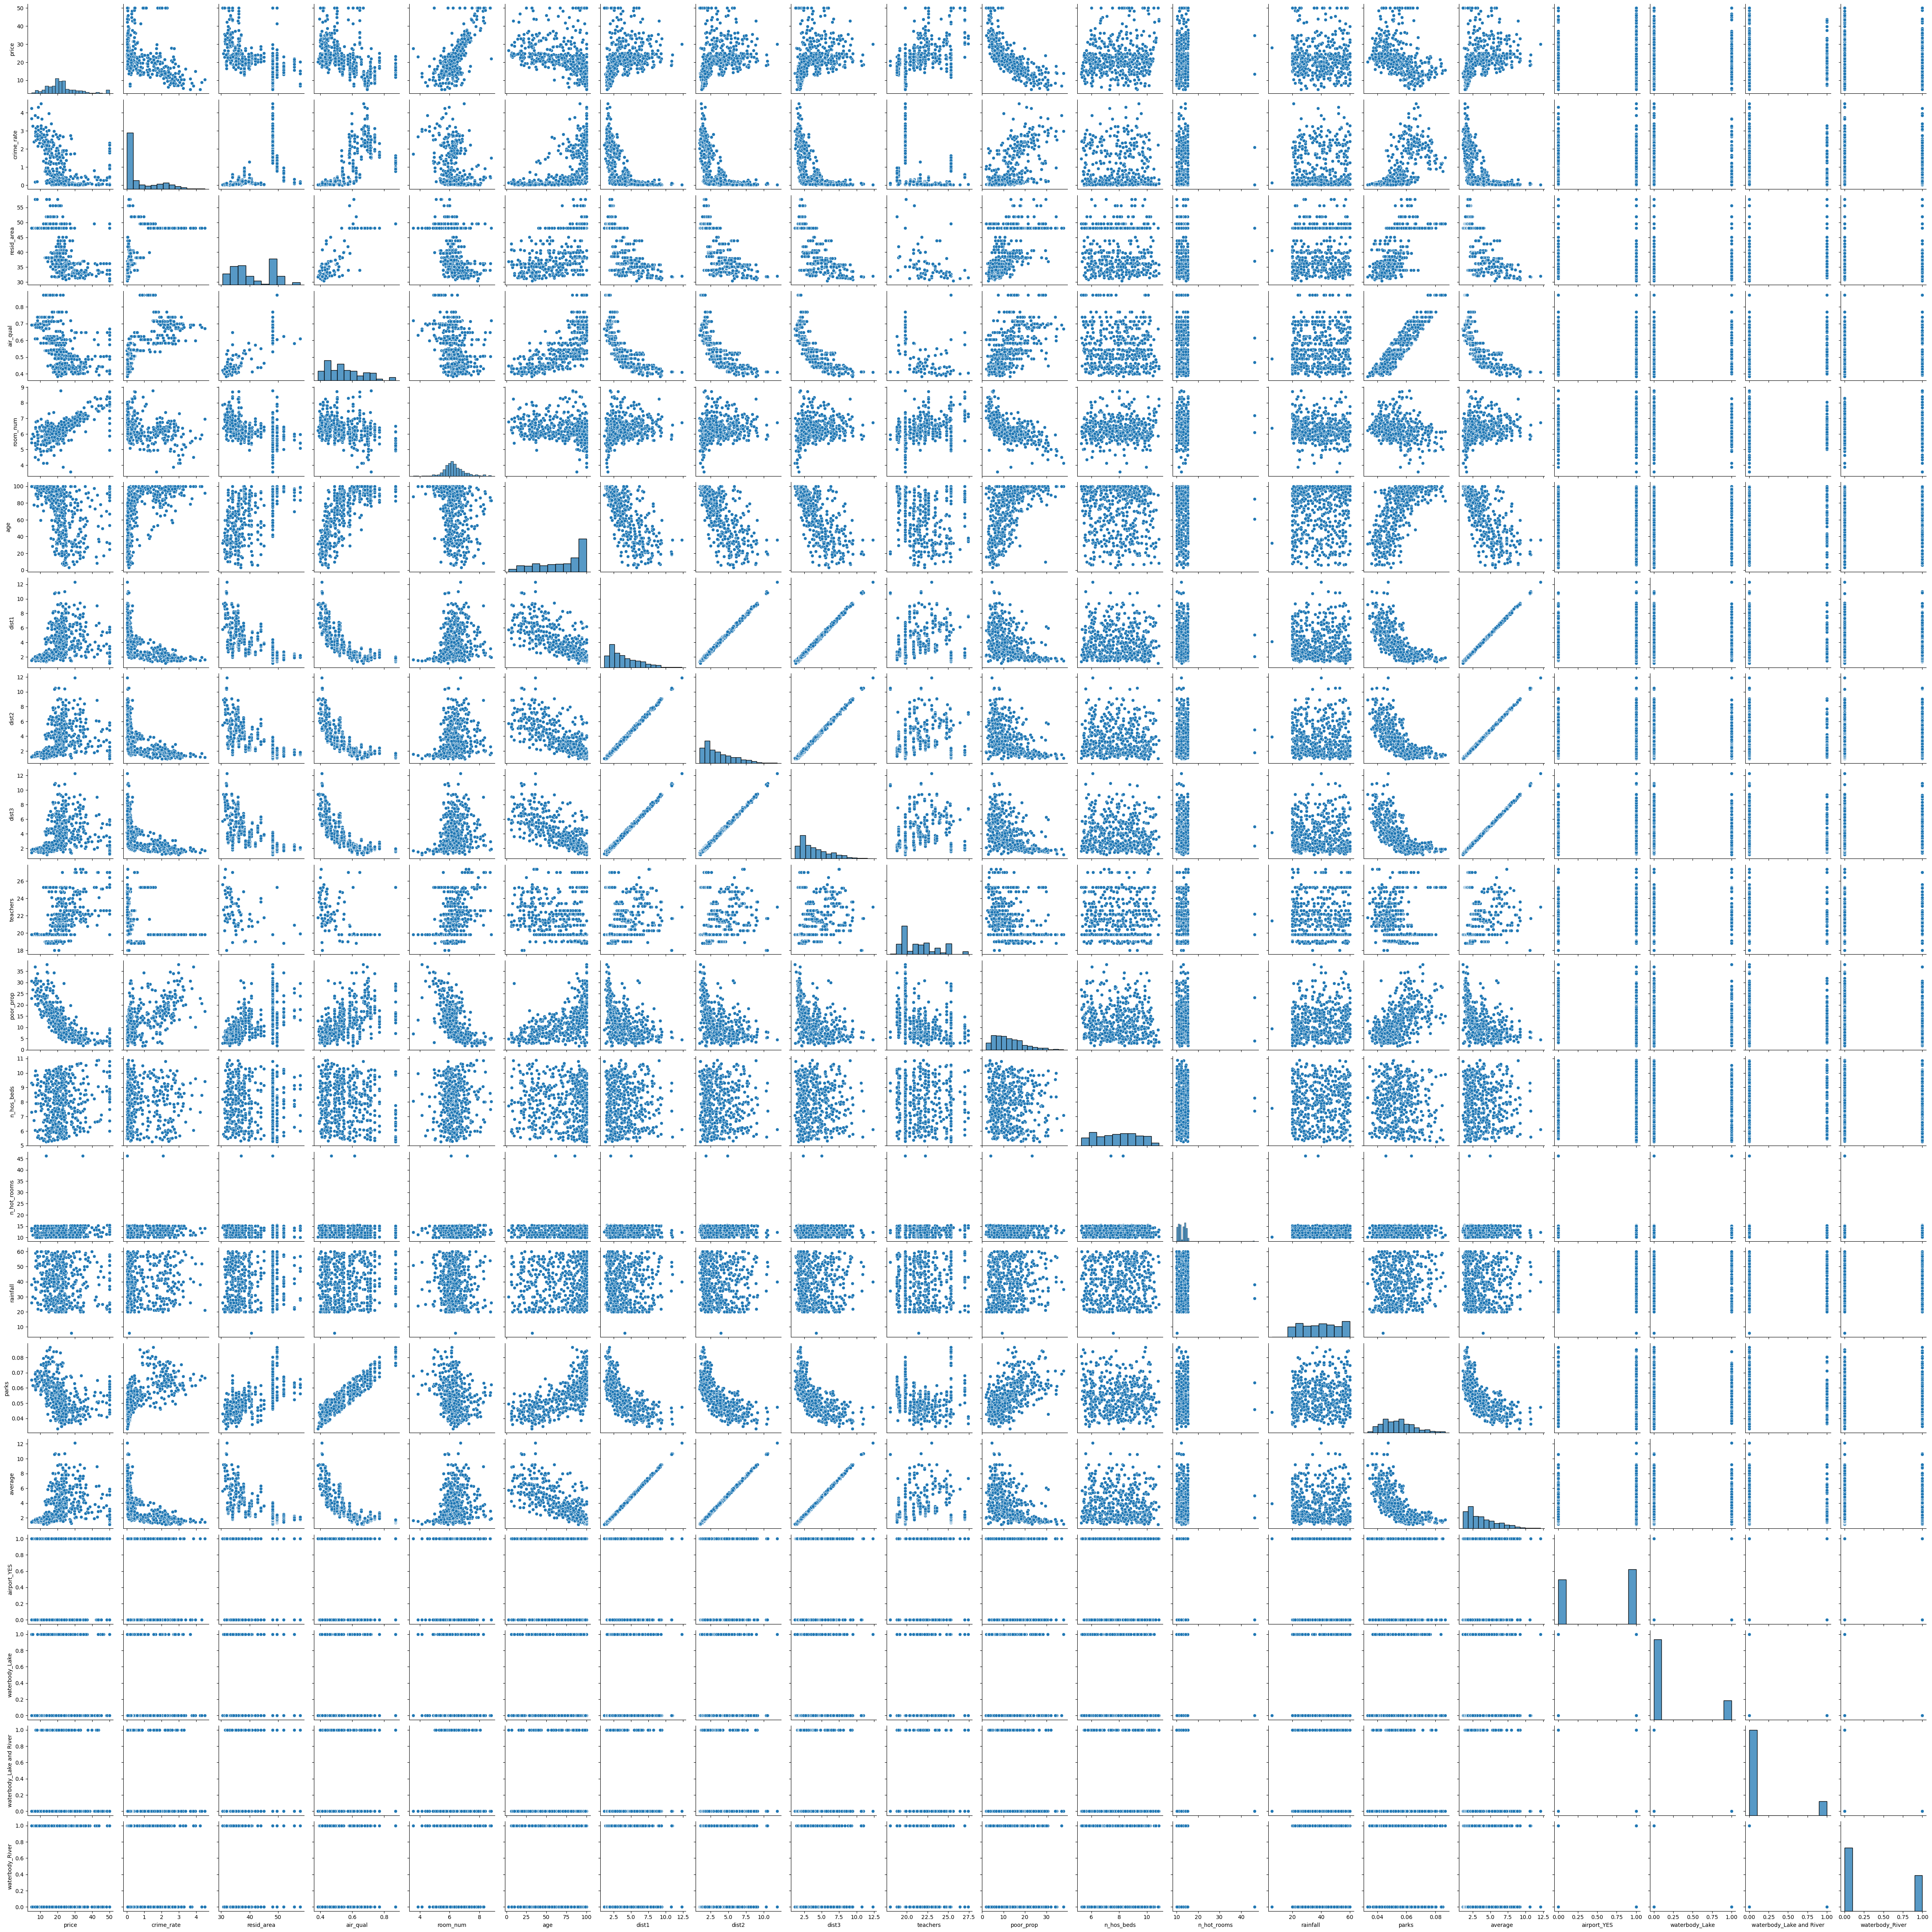

In [221]:
 sns.pairplot(df)

# Linear Regression

In [222]:
import statsmodels.api as sn

In [223]:
X = sn.add_constant(df['room_num'])

In [224]:
lm = sn.OLS(df['price'], X).fit()

In [225]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.31e-74
Time:                        19:49:25   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# another method

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
y = df['price']

In [228]:
X = df[['room_num']]

In [229]:
lm2 = LinearRegression()

In [230]:
lm2.fit(X,y)

LinearRegression()

In [231]:
print(lm2.intercept_, lm2.coef_)

-34.65924312309721 [9.09966966]


In [232]:
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

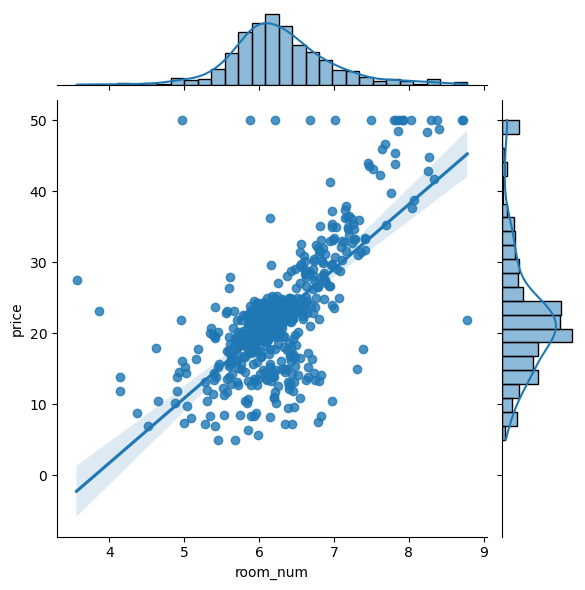

In [233]:
sns.jointplot(x = df['room_num'], y = df['price'], data =df, kind = 'reg')

# Multiple Linear Regression

In [234]:
import pandas as pd

In [235]:
X_multi = df.drop("price",axis=1)

In [236]:
X_multi.head()

crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  dist3  \
0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   4.18   
1    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   5.12   
2    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   5.01   
3    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   6.16   
4    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   6.37   

   teachers  poor_prop  n_hos_beds  n_hot_rooms  rainfall     parks  average  \
0      24.7       4.98       5.480     11.19200        23  0.049347   4.0875   
1      22.2       9.14       7.332     12.17280        42  0.046146   4.9675   
2      22.2       4.03       7.394     46.19856        38  0.045764   4.9675   
3      21.3       2.94       9.268     11.26720        45  0.047151   6.0650   
4      21.3       5.33       8.824     11.28960        55  0.039474   6.0625   

   airport_YES  waterbody_Lake  waterbody_Lake and River  waterbody_River  
0         True           False                     False             True  
1        False            True                     False            False  
2        False           False                     False            False  
3         True            True                     False            False  
4        False            True                     False            False

In [237]:
y_multi = df['price']

In [238]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [239]:
X_multi_cons = sn.add_constant(X_multi)

In [240]:
X_multi_cons.head()

const  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0    1.0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   
1    1.0    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   
2    1.0    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   
3    1.0    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   
4    1.0    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  teachers  poor_prop  n_hos_beds  n_hot_rooms  rainfall     parks  \
0   4.18      24.7       4.98       5.480     11.19200        23  0.049347   
1   5.12      22.2       9.14       7.332     12.17280        42  0.046146   
2   5.01      22.2       4.03       7.394     46.19856        38  0.045764   
3   6.16      21.3       2.94       9.268     11.26720        45  0.047151   
4   6.37      21.3       5.33       8.824     11.28960        55  0.039474   

   average  airport_YES  waterbody_Lake  waterbody_Lake and River  \
0   4.0875         True           False                     False   
1   4.9675        False            True                     False   
2   4.9675        False           False                     False   
3   6.0650         True            True                     False   
4   6.0625        False            True                     False   

   waterbody_River  
0             True  
1            False  
2            False  
3            False  
4            False

In [241]:
# convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# convert strings or other types to numeric values
y = pd.to_numeric(y, errors='coerce')

# add constant to exog variable
X = sn.add_constant(X)

# fit the model
lm_multi = sn.OLS(y, X).fit()


In [242]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.31e-74
Time:                        19:49:27   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
lm3 = LinearRegression()

In [244]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [245]:
print(lm3.intercept_, lm3.coef_)

-6.5617675772966955 [ 9.74901319e-03 -4.20693473e-02 -2.04895322e+01  4.01036840e+00
 -5.75423675e-03 -2.48780549e-01  1.45261620e+00 -1.52283472e+00
  1.01069128e+00 -5.77445291e-01  3.46790547e-01  8.92471342e-02
  1.53414411e-02  5.62851957e+01 -8.88106478e-01  1.11894889e+00
  2.19240081e-01 -6.83498764e-01 -2.67559051e-01]


In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train,X_test,y_train,y_test=train_test_split(X_multi, y_multi,test_size=0.2,random_state=0)

In [248]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 19) (102, 19) (404,) (102,)


In [249]:
lm_a=LinearRegression()

In [250]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [251]:
y_test_a=lm_a.predict(X_test)

In [252]:
y_train_a=lm_a.predict(X_train)

In [253]:
from sklearn.metrics import r2_score

In [254]:
r2_score(y_test,y_test_a)

0.5479115829730923

In [255]:
r2_score(y_train,y_train_a)

0.7581392975505914

# Perceptron

In [256]:
import numpy as np
import pandas as pd

In [257]:
from sklearn.datasets import load_iris
iris = load_iris()

In [258]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [259]:
X = iris.data[:, (2, 3)]  # petal length, petal width

In [260]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Categories
0 setosa
1 versicolor
2 virginica

In [261]:
y = (iris.target == 0)

In [262]:
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [263]:
y = (iris.target == 0).astype(int)

In [264]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [265]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [266]:
from sklearn.linear_model import Perceptron

In [267]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [268]:
y_pred = per_clf.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [269]:
from sklearn.metrics import accuracy_score


In [270]:
accuracy_score(y, y_pred)

1.0

In [271]:
per_clf.coef_

array([[-1.4, -2.2]])

In [272]:
per_clf.intercept_

array([4.])

# ANN

In [273]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [274]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [275]:
import tensorflow as tf
from tensorflow import keras

In [276]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [277]:
from tensorflow import keras


In [278]:
keras.version

AttributeError: module 'keras.api._v2.keras' has no attribute 'version'

In [ ]:
tf.__version_

In [ ]:
pip list | grep Keras


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train_full[10])
plt.show()  # Add this line to display the image


In [ ]:
y_train_full[0]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[10]]

In [ ]:
X_train_full[10]

# Data normalization

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_valid[0]

# Create the model architecture


In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
pip install pydot


In [ ]:
pip install graphviz


In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights

In [ ]:
weights.shape

In [ ]:
biases

In [ ]:
biases.shape

# compiling

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
model_history.params

In [ ]:
model_history.history

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluation

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
pip install pydot

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
print(plt.imshow(X_test[0]))

In [ ]:
print(plt.imshow(X_test[1]))

In [ ]:
print(plt.imshow(X_test[2]))

# Neural Network for Regression

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
print(housing.feature_names)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [ ]:
model.summary()

In [ ]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:
mae_test = model.evaluate(X_test, y_test)

In [ ]:
model_history.history

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])